In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster,datasets
from sklearn.cluster import KMeans
from scipy.cluster.vq import whiten

In [2]:
#load datasets
iris = datasets.load_iris()

In [4]:
[n_samples,n_features] = np.shape(iris.data)
n_labels = len(set(iris.target))

print("There are {} samples of data, with {} features and {} labels.".format(\
    n_samples, n_features, n_labels))

There are 150 samples of data, with 4 features and 3 labels.


In [9]:
print('\n'.join(iris.feature_names))

sepal length (cm)
sepal width (cm)
petal length (cm)
petal width (cm)


In [10]:
print('\n'.join(iris.target_names))

setosa
versicolor
virginica


In [11]:
sl_ind = 0    # Sepal Length
sw_ind = 1    # Septal Width
pl_ind = 2    # Petal Length
pw_ind = 3    # Petal Width

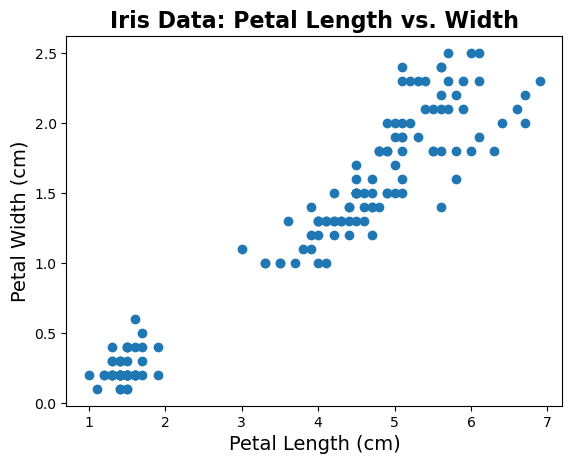

In [14]:
plt.scatter(iris.data[:,pl_ind],iris.data[:,pw_ind]);

plt.title('Iris Data: Petal Length vs. Width', fontsize=16, fontweight='bold')
plt.xlabel('Petal Length (cm)', fontsize=14);
plt.ylabel('Petal Width (cm)', fontsize=14);

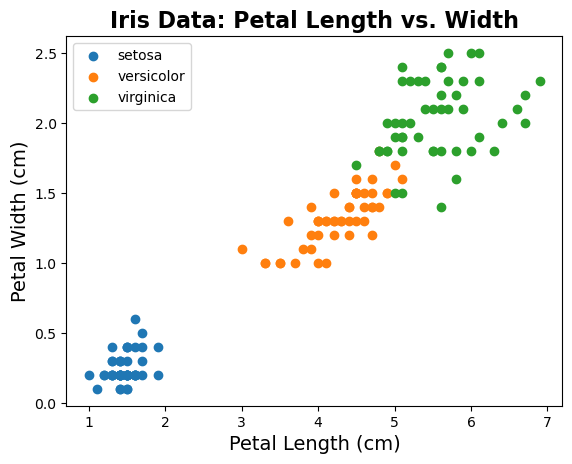

In [15]:
# Plot the data color coded by species
for ind in range(n_labels):
    plt.scatter(iris.data[:, pl_ind][iris.target==ind],
                iris.data[:, pw_ind][iris.target==ind],
                label=iris.target_names[ind])

# Add title, labels and legend
plt.title('Iris Data: Petal Length vs. Width', fontsize=16, fontweight='bold')
plt.xlabel('Petal Length (cm)', fontsize=14);
plt.ylabel('Petal Width (cm)', fontsize=14);
plt.legend(scatterpoints=1, loc='upper left');

# Note that the data, colored by label, can also be plotted like this:
#   plt.scatter(iris.data[:, pl_ind], iris.data[:, pw_ind], c=iris.target)
# It is, however, more difficult to add labelled legend when plotted this way

In [16]:
# Pull out the data of interest - Petal Length & Petal Width
d1 = np.array(iris.data[:, pl_ind])
d2 = np.array(iris.data[:, pw_ind])

In [17]:
# Whiten Data
d1w = whiten(d1)
d2w = whiten(d2)

In [18]:
# Combine data into an array to use with sklearn
data = np.vstack([d1w, d2w]).T

In [19]:
# Initialize K-means object, and set it to fit 3 clusters
km = KMeans(n_clusters=3, random_state=13)

In [20]:
# Fit the data with K-means
km.fit(data)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=13)

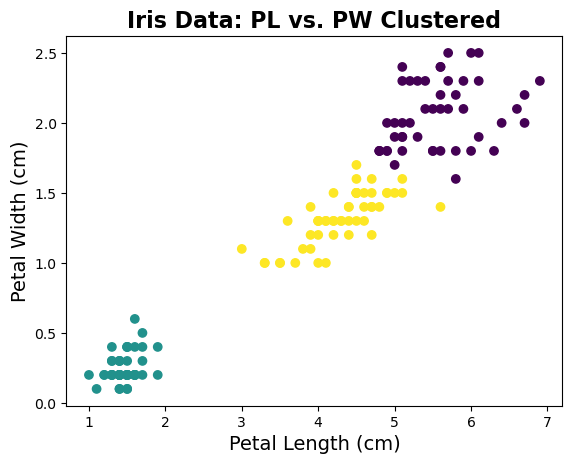

In [21]:
# Let's check out the clusters that KMeans found
plt.scatter(d1, d2, c=km.labels_);

# Add title, labels and legend
plt.title('Iris Data: PL vs. PW Clustered', fontsize=16, fontweight='bold')
plt.xlabel('Petal Length (cm)', fontsize=14);
plt.ylabel('Petal Width (cm)', fontsize=14);

In [22]:
print('Clustering approaches in sklearn:')
for name in dir(cluster):
    if name[0].isupper():
        print('  ', name)

Clustering approaches in sklearn:
   AffinityPropagation
   AgglomerativeClustering
   Birch
   BisectingKMeans
   DBSCAN
   FeatureAgglomeration
   HDBSCAN
   KMeans
   MeanShift
   MiniBatchKMeans
   OPTICS
   SpectralBiclustering
   SpectralClustering
   SpectralCoclustering
